# Supplemental Figures: Climatological P and T

Making a few plots of P and T to comapre to observations

In [1]:
# set up packages and data
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy

# set plotting resolution
dpi_out = 300 # lower res for drafts, higher res for final submission
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Verdana']})

# calculate d18O_0, need to filter for things above x mm/day
thres = 0.1 # mm/day 
thres_mps = thres*(1/86400)*(1/1000) # convert mm/day -> m/s

c6fann = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_free_ANN.nc", decode_timedelta = False)
c6fdjf = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_free_DJF.nc", decode_timedelta = False)
c6fjja = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_free_JJA.nc", decode_timedelta = False)

c6nann = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_nudg_ANN.nc", decode_timedelta = False)
c6ndjf = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_nudg_DJF.nc", decode_timedelta = False)
c6njja = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_nudg_JJA.nc", decode_timedelta = False)

# finally finally, get the iCAM5 data:
c5ann = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM5_free_ANN.nc", decode_timedelta = False, decode_times = False)
c5djf = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM5_free_DJF.nc", decode_timedelta = False, decode_times = False)
c5jja = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM5_free_JJA.nc", decode_timedelta = False, decode_times = False)

# pull in observational data files.
gpcp = xr.open_dataset("~/Dropbox/tagging_analysis/obs/gpcp/test2.nc", decode_timedelta = False, decode_times = False) 

gpcp_ann = gpcp.mean(dim='time')
gpcp_ann

era5 = xr.open_dataset("~/Dropbox/tagging_analysis/obs/era5/era5_prect_mmday.nc", decode_timedelta = False, decode_times = False)
era5_ann = 1000*era5.mean(dim='time')

era5t = xr.open_dataset("~/Dropbox/tagging_analysis/obs/era5/era5_temps_09x125.nc", decode_timedelta = False, decode_times = False)
era5t_ann = era5t.mean(dim='time')

best_ann = xr.open_dataset("~/Dropbox/tagging_analysis/obs/best/best_19801999avg_09x125.nc")

# convert m/s to mm/day:
c5ann['PRECTmmday'] = 86400*1000*c5ann.PRECT_H2O
c5djf['PRECTmmday'] = 86400*1000*c5djf.PRECT_H2O
c5jja['PRECTmmday'] = 86400*1000*c5jja.PRECT_H2O

c6nann['PRECTmmday'] = 86400*1000*c6nann.PRECT
c6ndjf['PRECTmmday'] = 86400*1000*c6ndjf.PRECT
c6njja['PRECTmmday'] = 86400*1000*c6njja.PRECT

c6fann['PRECTmmday'] = 86400*1000*c6fann.PRECT
c6fdjf['PRECTmmday'] = 86400*1000*c6fdjf.PRECT
c6fjja['PRECTmmday'] = 86400*1000*c6fjja.PRECT

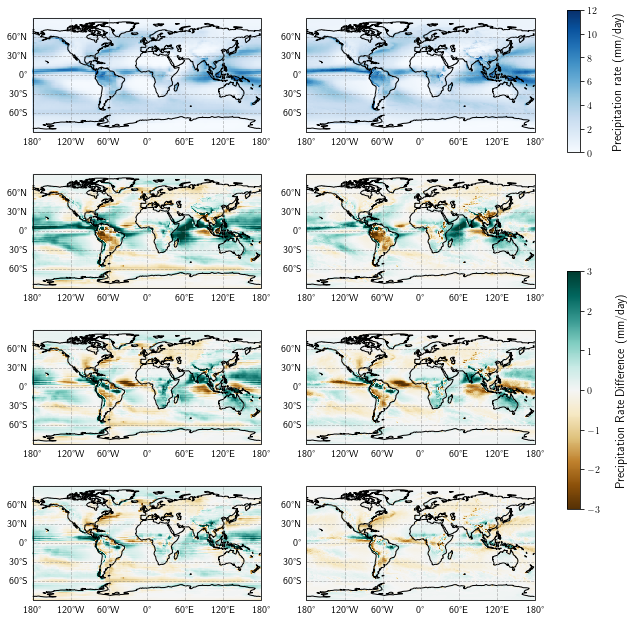

In [2]:
# compare w/ obs.

ds_p1 = xr.Dataset(
    data_vars={'gpcp' : (('lat','lon'), gpcp_ann.precip),
               'era5' : (('lat','lon'), era5_ann.tp),
               'c5'   : (('lat','lon'), c5ann.PRECTmmday),
               'c6f'   : (('lat','lon'), c6fann.PRECTmmday),
               'c6n'   : (('lat','lon'), c6nann.PRECTmmday)},
        coords = {'lat': c5ann.lat,
              'lon': c5ann.lon})

ds_p1

ds_p1['c5gpcpdiff'] = ds_p1.c5 - ds_p1.gpcp
ds_p1['c6fgpcpdiff'] = ds_p1.c6f - ds_p1.gpcp
ds_p1['c6ngpcpdiff'] = ds_p1.c6n - ds_p1.gpcp

ds_p1['c5era5diff'] = ds_p1.c5 - ds_p1.era5
ds_p1['c6fera5diff'] = ds_p1.c6f - ds_p1.era5
ds_p1['c6nera5diff'] = ds_p1.c6n - ds_p1.era5

ds_p1['absc5gpcpdiff'] = np.abs(ds_p1.c5 - ds_p1.gpcp)
ds_p1['absc6fgpcpdiff'] = np.abs(ds_p1.c6f - ds_p1.gpcp)
ds_p1['absc6ngpcpdiff'] = np.abs(ds_p1.c6n - ds_p1.gpcp)

ds_p1['absc5era5diff'] = np.abs(ds_p1.c5 - ds_p1.era5)
ds_p1['absc6fera5diff'] = np.abs(ds_p1.c6f - ds_p1.era5)
ds_p1['absc6nera5diff'] = np.abs(ds_p1.c6n - ds_p1.era5)


# now make the map plots:
fig = plt.figure(figsize=(9,11))

grid = gridspec.GridSpec(nrows = 4,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "Blues"
cmap2 = 'BrBG'

pmin = 0
pmax = 12
rmin = -3
rmax = 3

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid
ax4 = fig.add_subplot(grid[3], projection=proj) # upper cell of grid
ax5 = fig.add_subplot(grid[4], projection=proj) # middle cell of grid
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of grid
ax7 = fig.add_subplot(grid[6], projection=proj) # upper cell of grid
ax8 = fig.add_subplot(grid[7], projection=proj) # middle cell of grid

#---------------------
# observational panels

ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = gpcp_ann.precip.plot(ax = ax1,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
era5_ann.tp.plot(ax = ax2,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c5gpcpdiff.plot(ax = ax3,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c5era5diff.plot(ax = ax4,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c6fgpcpdiff.plot(ax = ax5,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c6fera5diff.plot(ax = ax6,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)
ax7.coastlines()
gl = ax7.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c6ngpcpdiff.plot(ax = ax7,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax8.coastlines()
gl = ax8.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = ds_p1.c6nera5diff.plot(ax = ax8,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

# turn off plot titles
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')
ax7.set_title('')
ax8.set_title('')

fig.subplots_adjust(right = 0.90)#, wspace=0.18, hspace=0.02)
cb1_ax = fig.add_axes([0.95, 0.70, 0.02, 0.18]) 
cbar1 = fig.colorbar(im1, cax=cb1_ax)
cbar1.set_label("Precipitation rate (mm/day)", size = 'large', labelpad = 15)

cb2_ax = fig.add_axes([0.95, 0.25, 0.02, 0.3])
cbar2 = fig.colorbar(im2, cax=cb2_ax)
cbar2.set_label("Precipitation Rate Difference (mm/day)", size = 'large', labelpad = 15)

plt.draw()
plt.savefig('plots/figS1.png', dpi=dpi_out, bbox_inches='tight')

In [3]:
# calculate global differences
weights = np.cos(np.deg2rad(c5ann.lat))
weights.name = "weights"
weights

ds_p1_weighted = ds_p1.weighted(weights)
ds_p1_weighted

ds_p1_avgs = ds_p1_weighted.mean(("lon","lat"))
ds_p1_avgs

<xarray.Dataset>
Dimensions:         ()
Data variables:
    gpcp            float64 2.689
    era5            float64 2.883
    c5              float64 3.077
    c6f             float64 2.889
    c6n             float64 2.789
    c5gpcpdiff      float64 0.3872
    c6fgpcpdiff     float64 0.1994
    c6ngpcpdiff     float64 0.09944
    c5era5diff      float64 0.1934
    c6fera5diff     float64 0.005661
    c6nera5diff     float64 -0.09432
    absc5gpcpdiff   float64 0.7292
    absc6fgpcpdiff  float64 0.6154
    absc6ngpcpdiff  float64 0.4615
    absc5era5diff   float64 0.5211
    absc6fera5diff  float64 0.4946
    absc6nera5diff  float64 0.3078

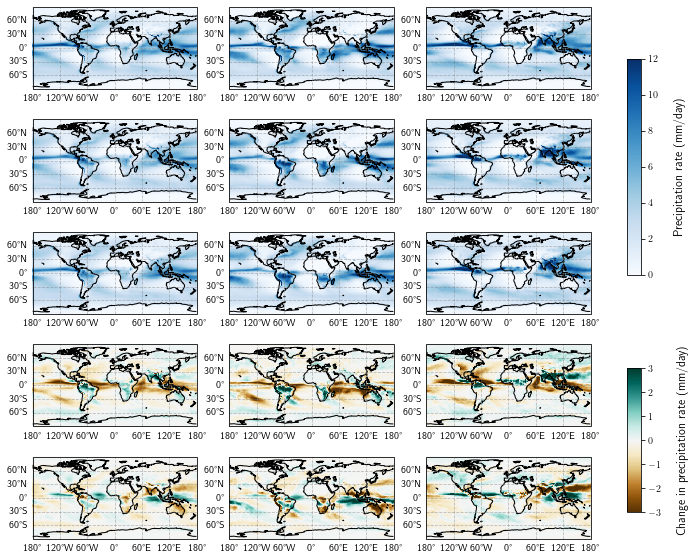

In [2]:
# Figure 1 - model precipitation comparisons
# now make the map plots:
fig = plt.figure(figsize=(10,10))

grid = gridspec.GridSpec(nrows = 5,
                        ncols = 3,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "Blues"
cmap2 = 'BrBG'

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid
ax4 = fig.add_subplot(grid[3], projection=proj) # upper cell of grid
ax5 = fig.add_subplot(grid[4], projection=proj) # middle cell of grid
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of grid
ax7 = fig.add_subplot(grid[6], projection=proj) # upper cell of grid
ax8 = fig.add_subplot(grid[7], projection=proj) # middle cell of grid
ax9 = fig.add_subplot(grid[8], projection=proj) # lower cell of grid
ax10 = fig.add_subplot(grid[9], projection=proj) # upper cell of grid
ax11 = fig.add_subplot(grid[10], projection=proj) # middle cell of grid
ax12 = fig.add_subplot(grid[11], projection=proj) # lower cell of grid
ax13 = fig.add_subplot(grid[12], projection=proj) # upper cell of grid
ax14 = fig.add_subplot(grid[13], projection=proj) # middle cell of grid
ax15 = fig.add_subplot(grid[14], projection=proj) # lower cell of grid

#-----------------------------------------------
# First row: seasonal plots of iCAM5.

pmin = 0
pmax = 12
rmin = -3
rmax = 3

# left: annual mean, iCAM5
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5ann.PRECTmmday.plot(ax = ax1,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

# middle: djf mean, iCAM5
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5djf.PRECTmmday.plot(ax = ax2,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

# lower left: annual mean, iCAM5
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5jja.PRECTmmday.plot(ax = ax3,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

#----------------------------------------------
# second row: free iCAM6

# left: annual mean, iCAM6
ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fann.PRECTmmday.plot(ax = ax4,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                     add_colorbar = False)

# middle middle: DJF mean, iCAM6
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fdjf.PRECTmmday.plot(ax = ax5,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                     add_colorbar = False)

# bottom middle: JJA mean, iCAM6
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fjja.PRECTmmday.plot(ax = ax6,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                     add_colorbar = False)

#----------------------------------------------
# third row: free iCAM6

# left: annual mean, iCAM6
ax7.coastlines()
gl = ax7.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6nann.PRECTmmday.plot(ax = ax7,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                     add_colorbar = False)

# middle middle: DJF mean, iCAM6
ax8.coastlines()
gl = ax8.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6ndjf.PRECTmmday.plot(ax = ax8,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                     add_colorbar = False)

# bottom middle: JJA mean, iCAM6
ax9.coastlines()
gl = ax9.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = c6njja.PRECTmmday.plot(ax = ax9,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                     add_colorbar = False)

#-------------------------------------------
# fourth row: difference between cam5 and 6, both free

cam_diff = 86400*1000*(c6fann.PRECT - c5ann.PRECT_H216O)

# left: annual mean, iCAM6
ax10.coastlines()
gl = ax10.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = cam_diff.plot(ax = ax10,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = 86400*1000*(c6fdjf.PRECT - c5djf.PRECT_H216O)

# middle: annual mean, iCAM6
ax11.coastlines()
gl = ax11.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax11,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = 86400*1000*(c6fjja.PRECT - c5jja.PRECT_H216O)

# left: annual mean, iCAM6
ax12.coastlines()
gl = ax12.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax12,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

#---------------------------------------------------
# fourth row: difference between cam5 and 6, both free

cam_diff = 86400*1000*(c6nann.PRECT - c6fann.PRECT)

# left: annual mean, iCAM6
ax13.coastlines()
gl = ax13.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax13,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = 86400*1000*(c6ndjf.PRECT - c6fdjf.PRECT)

# middle: annual mean, iCAM6
ax14.coastlines()
gl = ax14.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax14,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = 86400*1000*(c6njja.PRECT - c6fjja.PRECT)

# left: annual mean, iCAM6
ax15.coastlines()
gl = ax15.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax15,
              cmap = cmap2,
              transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
              add_colorbar = False)

# turn off plot titles
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')
ax7.set_title('')
ax8.set_title('')
ax9.set_title('')
ax10.set_title('')
ax11.set_title('')
ax12.set_title('')
ax13.set_title('')
ax14.set_title('')
ax15.set_title('')

fig.subplots_adjust(right = 0.90)#, wspace=0.18, hspace=0.02)
cb1_ax = fig.add_axes([0.95, 0.50, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax=cb1_ax)
cbar1.set_label("Precipitation rate (mm/day)", size = 'large', labelpad = 15)

cb2_ax = fig.add_axes([0.95, 0.17, 0.02, 0.2])
cbar2 = fig.colorbar(im2, cax=cb2_ax)
cbar2.set_label("Change in precipitation rate (mm/day)", size = 'large', labelpad = 15)

plt.draw()
plt.savefig('plots/figS2.png',dpi=dpi_out,bbox_inches='tight')

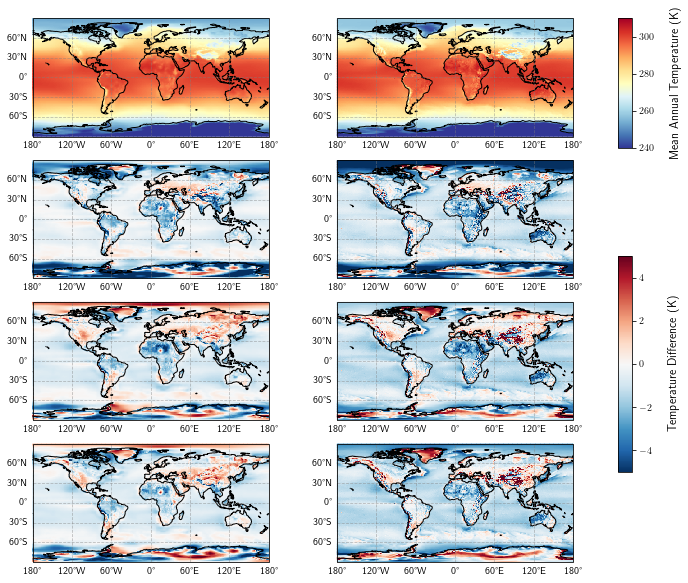

In [5]:
# compare w/ obs.

ds_p1 = xr.Dataset(
    data_vars={'best' : (('lat','lon'), best_ann.__xarray_dataarray_variable__),
               'era5' : (('lat','lon'), era5t_ann.skt),
               'c5'   : (('lat','lon'), c5ann.TREFHT),
               'c6f'   : (('lat','lon'), c6fann.TREFHT),
               'c6n'   : (('lat','lon'), c6nann.TREFHT)},
        coords = {'lat': c5ann.lat,
              'lon': c5ann.lon})

ds_p1

ds_p1['c5bestdiff'] = ds_p1.c5 - ds_p1.best
ds_p1['c6fbestdiff'] = ds_p1.c6f - ds_p1.best
ds_p1['c6nbestdiff'] = ds_p1.c6n - ds_p1.best

ds_p1['c5era5diff'] = ds_p1.c5 - ds_p1.era5
ds_p1['c6fera5diff'] = ds_p1.c6f - ds_p1.era5
ds_p1['c6nera5diff'] = ds_p1.c6n - ds_p1.era5

ds_p1['absc5bestdiff'] = np.abs(ds_p1.c5 - ds_p1.best)
ds_p1['absc6fbestdiff'] = np.abs(ds_p1.c6f - ds_p1.best)
ds_p1['absc6nbestdiff'] = np.abs(ds_p1.c6n - ds_p1.best)

ds_p1['absc5era5diff'] = np.abs(ds_p1.c5 - ds_p1.era5)
ds_p1['absc6fera5diff'] = np.abs(ds_p1.c6f - ds_p1.era5)
ds_p1['absc6nera5diff'] = np.abs(ds_p1.c6n - ds_p1.era5)

# now make the map plots:
fig = plt.figure(figsize=(10,10))

grid = gridspec.GridSpec(nrows = 4,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "RdYlBu_r"
cmap2 = 'RdBu_r'

pmin = 240
pmax = 310
rmin = -5
rmax = 5

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid
ax4 = fig.add_subplot(grid[3], projection=proj) # upper cell of grid
ax5 = fig.add_subplot(grid[4], projection=proj) # middle cell of grid
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of grid
ax7 = fig.add_subplot(grid[6], projection=proj) # upper cell of grid
ax8 = fig.add_subplot(grid[7], projection=proj) # middle cell of grid

#---------------------
# observational panels

ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = best_ann.__xarray_dataarray_variable__.plot(ax = ax1,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
era5t_ann.skt.plot(ax = ax2,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c5bestdiff.plot(ax = ax3,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c5era5diff.plot(ax = ax4,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = ds_p1.c6fbestdiff.plot(ax = ax5,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c6fera5diff.plot(ax = ax6,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)
ax7.coastlines()
gl = ax7.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c6nbestdiff.plot(ax = ax7,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

ax8.coastlines()
gl = ax8.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.c6nera5diff.plot(ax = ax8,
                    cmap = cmap2,
                    transform = ccrs.PlateCarree(),
                    vmin = rmin,
                    vmax = rmax,
                    add_colorbar = False)

# turn off plot titles
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')
ax7.set_title('')
ax8.set_title('')

fig.subplots_adjust(right = 0.90)#, wspace=0.18, hspace=0.02)
cb1_ax = fig.add_axes([0.95, 0.70, 0.02, 0.18]) 
cbar1 = fig.colorbar(im1, cax=cb1_ax)
cbar1.set_label("Mean Annual Temperature (K)", size = 'large', labelpad = 15)

cb2_ax = fig.add_axes([0.95, 0.25, 0.02, 0.3])
cbar2 = fig.colorbar(im2, cax=cb2_ax)
cbar2.set_label("Temperature Difference (K)", size = 'large', labelpad = 15)

plt.draw()
plt.savefig('plots/figS3.png',dpi=dpi_out,bbox_inches='tight')

In [6]:
# calculate global differences
weights = np.cos(np.deg2rad(c5ann.lat))
weights.name = "weights"
weights

ds_p1_weighted = ds_p1.weighted(weights)
ds_p1_weighted

ds_p1_avgs = ds_p1_weighted.mean(("lon","lat"))
ds_p1_avgs

<xarray.Dataset>
Dimensions:         ()
Data variables:
    best            float64 287.7
    era5            float64 288.1
    c5              float64 286.9
    c6f             float64 287.1
    c6n             float64 287.1
    c5bestdiff      float64 -0.7656
    c6fbestdiff     float64 -0.5647
    c6nbestdiff     float64 -0.5865
    c5era5diff      float64 -1.18
    c6fera5diff     float64 -0.9789
    c6nera5diff     float64 -1.001
    absc5bestdiff   float64 0.9502
    absc6fbestdiff  float64 0.9096
    absc6nbestdiff  float64 0.8895
    absc5era5diff   float64 1.412
    absc6fera5diff  float64 1.407
    absc6nera5diff  float64 1.405

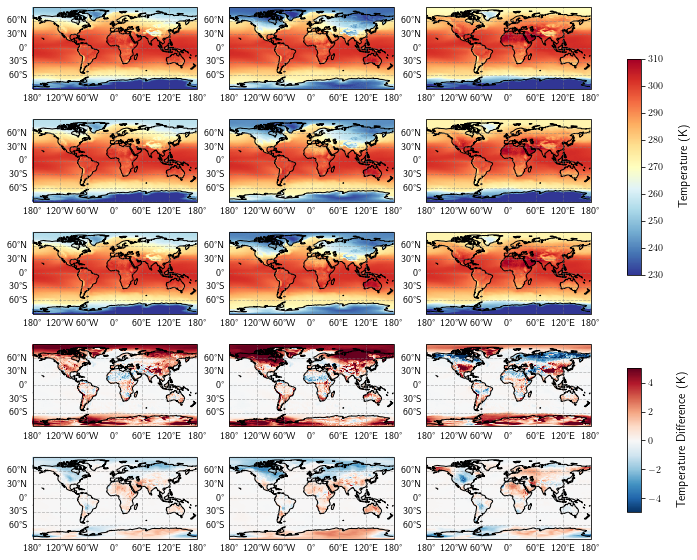

In [7]:
# Figure 1 - model precipitation comparisons
# now make the map plots:
fig = plt.figure(figsize=(10,10))

grid = gridspec.GridSpec(nrows = 5,
                        ncols = 3,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "RdYlBu_r"
cmap2 = 'RdBu_r'

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid
ax4 = fig.add_subplot(grid[3], projection=proj) # upper cell of grid
ax5 = fig.add_subplot(grid[4], projection=proj) # middle cell of grid
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of grid
ax7 = fig.add_subplot(grid[6], projection=proj) # upper cell of grid
ax8 = fig.add_subplot(grid[7], projection=proj) # middle cell of grid
ax9 = fig.add_subplot(grid[8], projection=proj) # lower cell of grid
ax10 = fig.add_subplot(grid[9], projection=proj) # upper cell of grid
ax11 = fig.add_subplot(grid[10], projection=proj) # middle cell of grid
ax12 = fig.add_subplot(grid[11], projection=proj) # lower cell of grid
ax13 = fig.add_subplot(grid[12], projection=proj) # upper cell of grid
ax14 = fig.add_subplot(grid[13], projection=proj) # middle cell of grid
ax15 = fig.add_subplot(grid[14], projection=proj) # lower cell of grid

#-----------------------------------------------
# First row: seasonal plots of iCAM5.

pmin = 230
pmax = 310
rmin = -5
rmax = 5

# left: annual mean, iCAM5
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5ann.TS.plot(ax = ax1,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

# middle: djf mean, iCAM5
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5djf.TS.plot(ax = ax2,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

# lower left: annual mean, iCAM5
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5jja.TS.plot(ax = ax3,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = pmin,
                    vmax = pmax,
                    add_colorbar = False)

#----------------------------------------------
# second row: free iCAM6

# left: annual mean, iCAM6
ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fann.TS.plot(ax = ax4,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = pmin,
                     vmax = pmax,
                     add_colorbar = False)

# middle middle: DJF mean, iCAM6
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fdjf.TS.plot(ax = ax5,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = pmin,
                     vmax = pmax,
                     add_colorbar = False)

# bottom middle: JJA mean, iCAM6
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fjja.TS.plot(ax = ax6,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = pmin,
                     vmax = pmax,
                     add_colorbar = False)

#----------------------------------------------
# third row: free iCAM6

# left: annual mean, iCAM6
ax7.coastlines()
gl = ax7.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6nann.TS.plot(ax = ax7,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = pmin,
                     vmax = pmax,
                     add_colorbar = False)

# middle middle: DJF mean, iCAM6
ax8.coastlines()
gl = ax8.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6ndjf.TS.plot(ax = ax8,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = pmin,
                     vmax = pmax,
                     add_colorbar = False)

# bottom middle: JJA mean, iCAM6
ax9.coastlines()
gl = ax9.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = c6njja.TS.plot(ax = ax9,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = pmin,
                     vmax = pmax,
                     add_colorbar = False)

#-------------------------------------------
# fourth row: difference between cam5 and 6, both free

cam_diff = (c6fann.TS - c5ann.TS)

# left: annual mean, iCAM6
ax10.coastlines()
gl = ax10.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = cam_diff.plot(ax = ax10,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = (c6fdjf.TS - c5djf.TS)

# middle: annual mean, iCAM6
ax11.coastlines()
gl = ax11.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax11,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = (c6fjja.TS - c5jja.TS)

# left: annual mean, iCAM6
ax12.coastlines()
gl = ax12.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax12,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

#---------------------------------------------------
# fourth row: difference between cam5 and 6, both free

cam_diff = (c6nann.TS - c6fann.TS)

# left: annual mean, iCAM6
ax13.coastlines()
gl = ax13.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax13,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = (c6ndjf.TS - c6fdjf.TS)

# middle: annual mean, iCAM6
ax14.coastlines()
gl = ax14.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax14,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
                     add_colorbar = False)

cam_diff = (c6njja.TS - c6fjja.TS)

# left: annual mean, iCAM6
ax15.coastlines()
gl = ax15.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax15,
              cmap = cmap2,
              transform = ccrs.PlateCarree(),
                     vmin = rmin,
                     vmax = rmax,
              add_colorbar = False)

# turn off plot titles
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')
ax7.set_title('')
ax8.set_title('')
ax9.set_title('')
ax10.set_title('')
ax11.set_title('')
ax12.set_title('')
ax13.set_title('')
ax14.set_title('')
ax15.set_title('')

fig.subplots_adjust(right = 0.90)#, wspace=0.18, hspace=0.02)
cb1_ax = fig.add_axes([0.95, 0.50, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax=cb1_ax)
cbar1.set_label("Temperature (K)", size = 'large', labelpad = 15)

cb2_ax = fig.add_axes([0.95, 0.17, 0.02, 0.2])
cbar2 = fig.colorbar(im2, cax=cb2_ax)
cbar2.set_label("Temperature Difference (K)", size = 'large', labelpad = 15)

plt.draw()
plt.savefig('plots/figS4.png',dpi=dpi_out,bbox_inches='tight')